# Bank Loan Status Classification

This notebook consists of the detailed analysis and explanations of describing the status of loan applications. 
- The dataset consists of two parts, Train set and Test set. 

Below I am trying to import all the necessary libraries which are required to run this code


In [343]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import joblib

import matplotlib.pyplot as plt 
plt.rc("font", size=13)
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, random_split, DataLoader

import xgboost as xgb
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [344]:
# Read the train data set
data_train = pd.read_csv("data/bank_data.csv", header=0)
data_train

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

The training dataset consists of 100514 rows and 19 columns, there are 18 features and one target column which is Loan Status.

- Loan ID:
  Unique identifier for each loan in the dataset.

- Customer ID:
Unique identifier for each customer in the dataset.

- Loan Status:
Categorical variable indicating the status of the loan. Two categories are present: "Fully Paid" and "Charged Off."

- Current Loan Amount:
The amount of money the borrower currently owes on the loan.

- Term:
The term (duration) of the loan, expressed in months (e.g., 15 years, 30 years).

- Credit Score:
A numerical representation of the borrower's creditworthiness. Higher scores indicate better credit.

- Annual Income:
The total income of the borrower in a year.

- Years in Current Job:
The number of years the borrower has been in their current job.

- Home Ownership:
Categorical variable indicating the type of home ownership (e.g., own, mortgage, rent).

- Purpose:
The purpose of the loan, such as debt consolidation, home purchase, or other specified reasons.

- Monthly Debt:
The total monthly debt payments, including the loan under consideration.

- Years of Credit History:
The total number of years the borrower has had credit.

- Months since Last Delinquent:
The number of months since the borrower's last delinquency (failure to make a required payment).

- Number of Open Accounts:
The total number of open credit accounts the borrower has.

- Number of Credit Problems:
The number of credit problems the borrower has had, such as late payments or defaults.

- Current Credit Balance:
The total amount of the borrower's current outstanding debt.

- Maximum Open Credit:
The maximum amount of credit the borrower has been approved for.

- Bankruptcies:
The number of bankruptcies the borrower has filed.

- Tax Liens:
The number of tax liens against the borrower.

### Understanding the Target column

"Loan status" column has two categories: "fully paid" and "charged off."

- Fully Paid:

This category typically indicates that the borrower has successfully repaid the loan according to the agreed-upon terms. In other words, the borrower has fulfilled their financial obligations, and the loan is considered closed.

- Charged Off:

This category usually indicates that the lender has given up on collecting the outstanding amount from the borrower. A loan is charged off when the lender believes that the borrower is unlikely to repay the remaining balance. This doesn't mean the borrower is absolved of the debt; it just means that the lender doesn't expect to recover the full amount.

In [345]:
# Check the shape of train data
data_train.shape

(100514, 19)

In [346]:
# Check the number of columns in my dataset
data_train.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [347]:
# Read the train data set
data_test = pd.read_csv("data/credit_test.csv", header=0)
data_test

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [348]:
# Check the shape of test data
data_test.shape

(10353, 18)

In [349]:
# Check the number of columns in my dataset
data_test.columns


# Target column Loan staus column is missing in test set

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

# Data Cleaning

In [350]:
data_train.describe().T 

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,100000.0,1.176045e+07,3.178394e+07,10802.0,179652.0000,312246.0,5.249420e+05,1.000000e+08
Credit Score,80846.0,1.076456e+03,1.475404e+03,585.0,705.0000,724.0,7.410000e+02,7.510000e+03
Annual Income,80846.0,1.378277e+06,1.081360e+06,76627.0,848844.0000,1174162.0,1.650663e+06,1.655574e+08
Monthly Debt,100000.0,1.847241e+04,1.217499e+04,0.0,10214.1625,16220.3,2.401206e+04,4.358433e+05
Years of Credit History,100000.0,1.819914e+01,7.015324e+00,3.6,13.5000,16.9,2.170000e+01,7.050000e+01
Months since last delinquent,46859.0,3.490132e+01,2.199783e+01,0.0,16.0000,32.0,5.100000e+01,1.760000e+02
Number of Open Accounts,100000.0,1.112853e+01,5.009870e+00,0.0,8.0000,10.0,1.400000e+01,7.600000e+01
Number of Credit Problems,100000.0,1.683100e-01,4.827050e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01
Current Credit Balance,100000.0,2.946374e+05,3.761709e+05,0.0,112670.0000,209817.0,3.679588e+05,3.287897e+07
Maximum Open Credit,99998.0,7.607984e+05,8.384503e+06,0.0,273438.0000,467874.0,7.829580e+05,1.539738e+09


In [351]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [352]:
# Number of unique ids
unique_loan = len(data_train["Loan ID"].unique())
unique_customer = len(data_train["Customer ID"].unique())

print(f"Number of unique loan ID:", unique_loan)
print(f"Number of unique cusomer ID:", unique_customer)

Number of unique loan ID: 82000
Number of unique cusomer ID: 82000


In [353]:
# Function to loop through every column and save the values into a dataframe
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []

def col_1(df_1):
    for column_name in df_1.columns:
        col1.append(column_name)
        col2.append(df_1[column_name].nunique())
        col3.append(df_1[column_name].isnull().any())
        col4.append(df_1[column_name].duplicated().any())
        col5.append(df_1[column_name].value_counts())

        # print("---> Number of unique values : {}".format(df_1[column_name].nunique()))
        # print("---> Null values present inside : {}".format(df_1[column_name].isnull().any()))
        # print("---> Are there any duplicated values : {}".format(df_1[column_name].duplicated().any()))
        # print("---> How many value counts : {}".format(df_1[column_name].value_counts()))
        # print("                                                                                         ")

col_1(data_train)

Table_info = pd.DataFrame({'column_name': col1, 'unique_values': col2, 
'any_null_values': col3, 'any_duplicates': col4, 'values_counts': col5})

Table_info  

,column_name,unique_values,any_null_values,any_duplicates,values_counts
0,Loan ID,81999,True,True,Loan ID 14dd8831-6af5-400b-83ec-68e61888a048 ...
1,Customer ID,81999,True,True,Customer ID 981165ec-3274-42f5-a3b4-d104041a9c...
2,Loan Status,2,True,True,Loan Status Fully Paid 77361 Charged Off ...
3,Current Loan Amount,22004,True,True,Current Loan Amount 99999999.0 11484 223102...
4,Term,2,True,True,Term Short Term 72208 Long Term 27792 N...
5,Credit Score,324,True,True,Credit Score 747.0 1825 740.0 1746 746...
6,Annual Income,36174,True,True,Annual Income 1162572.0 22 973370.0 19 ...
7,Years in current job,11,True,True,Years in current job 10+ years 31121 2 year...
8,Home Ownership,4,True,True,Home Ownership Home Mortgage 48410 Rent ...
9,Purpose,16,True,True,Purpose Debt Consolidation 78552 other ...


In [354]:
# Function to calculate null values and their percentage
def calculate_null_values(dataframe):
    d_frame = dataframe
    # get the sum of the null value of  each column 
    d_frame_null_values = pd.DataFrame(dataframe.isna().sum())
    # reset the dataframe index
    d_frame_null_values.reset_index(inplace=True)
    # add colume header to the dataframe
    d_frame_null_values.columns = ['Field_names', 'Null_value']
    #calculate the percentage of null or missing values 
    d_frame_null_value_percentage = dataframe.isnull().sum() / len(dataframe) * 100
    d_frame_null_value_percentage = pd.DataFrame(d_frame_null_value_percentage)
    d_frame_null_value_percentage.reset_index(inplace=True)
    d_frame_null_value_percentage = pd.DataFrame(d_frame_null_value_percentage)
    d_frame_null_values['Null_values_percentage'] = d_frame_null_value_percentage[0]
    return d_frame_null_values


calculate_null_values(data_train)

,Field_names,Null_value,Null_values_percentage
0,Loan ID,514,0.511372
1,Customer ID,514,0.511372
2,Loan Status,514,0.511372
3,Current Loan Amount,514,0.511372
4,Term,514,0.511372
5,Credit Score,19668,19.567423
6,Annual Income,19668,19.567423
7,Years in current job,4736,4.711781
8,Home Ownership,514,0.511372
9,Purpose,514,0.511372


- All the last 514 rows of data has null values so we can drop them
- From the above analysis we work on the columns which has more percentage of null values, and clean the data

## Feature Engineering

In [355]:
# All the last rows of all columns has null values so we can drop them
data_train[data_train['Years of Credit History'].isnull() == True]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [356]:
# about 50 % of data is missing 
data_train.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [357]:
# Dropping the last rows in the dataset
data_train.drop(data_train.tail(514).index, inplace=True) # drop last 514 rows
calculate_null_values(data_train)

,Field_names,Null_value,Null_values_percentage
0,Loan ID,0,0.000
1,Customer ID,0,0.000
2,Loan Status,0,0.000
3,Current Loan Amount,0,0.000
4,Term,0,0.000
5,Credit Score,19154,19.154
6,Annual Income,19154,19.154
7,Years in current job,4222,4.222
8,Home Ownership,0,0.000
9,Purpose,0,0.000


We now has very few columns with null values, so we tried to work on these columns to reduce the null values completely

In [358]:
for i in data_train['Maximum Open Credit'][data_train['Maximum Open Credit'].isnull() == True].index:
    data_train.drop(labels=i, inplace=True)


In [359]:
for i in data_train['Bankruptcies'][data_train['Bankruptcies'].isnull() == True].index:
    data_train.drop(labels=i, inplace=True)

In [360]:
for i in data_train['Tax Liens'][data_train['Tax Liens'].isnull() == True].index:
    data_train.drop(labels=i, inplace=True)

calculate_null_values(data_train)

,Field_names,Null_value,Null_values_percentage
0,Loan ID,0,0.000000
1,Customer ID,0,0.000000
2,Loan Status,0,0.000000
3,Current Loan Amount,0,0.000000
4,Term,0,0.000000
5,Credit Score,19111,19.150450
6,Annual Income,19111,19.150450
7,Years in current job,4222,4.230715
8,Home Ownership,0,0.000000
9,Purpose,0,0.000000


Now we have null values in only Credit Score, Annual Income, Years in Current job columns to handle.

In [361]:
# Analysing the target column wrt to another features
data_train['Loan Status'].hist()

<Axes: >

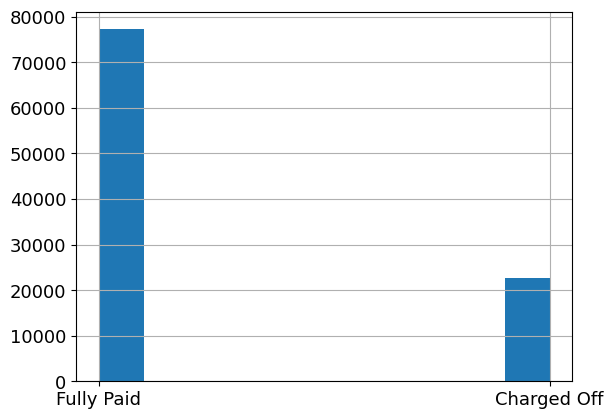

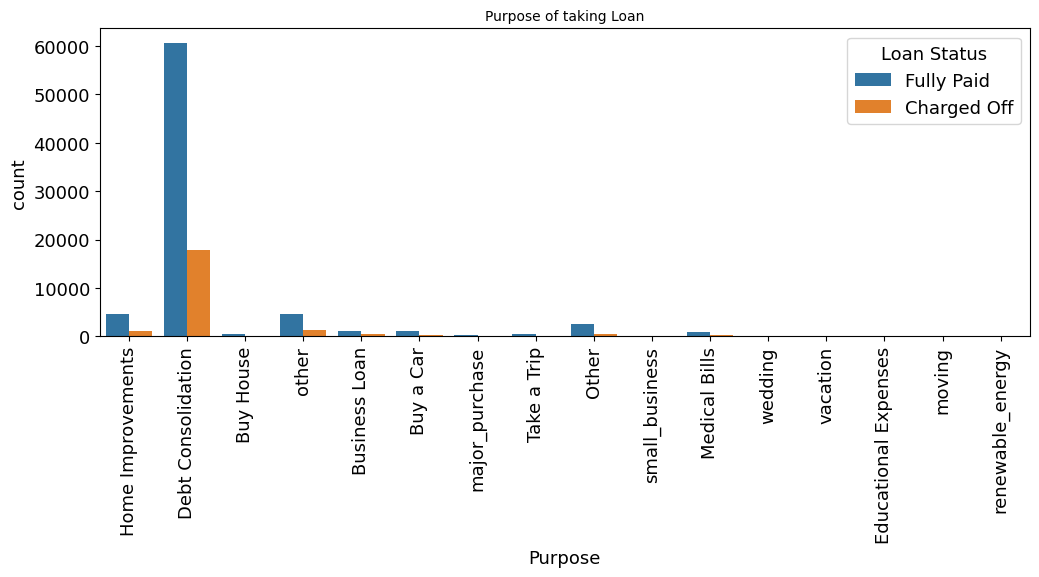

In [362]:
# Purpose of taking loan
plt.figure(figsize=(12,4))
sns.countplot(x='Purpose',data=data_train,hue='Loan Status')
plt.xticks(rotation=90)
plt.title('Purpose of taking Loan',fontdict={'fontsize':10})
plt.show()

In [363]:
# In purpose column there are two same categories with different names 'other' & 'Other', so combining them both
data_train.Purpose = data_train.Purpose.str.replace('other','Other')
data_train.Purpose.value_counts()

Purpose
Debt Consolidation      78430
Other                    9252
Home Improvements        5828
Business Loan            1555
Buy a Car                1260
Medical Bills            1124
Buy House                 678
Take a Trip               572
major_purchase            352
small_business            277
moving                    150
wedding                   112
vacation                  101
Educational Expenses       93
renewable_energy           10
Name: count, dtype: int64

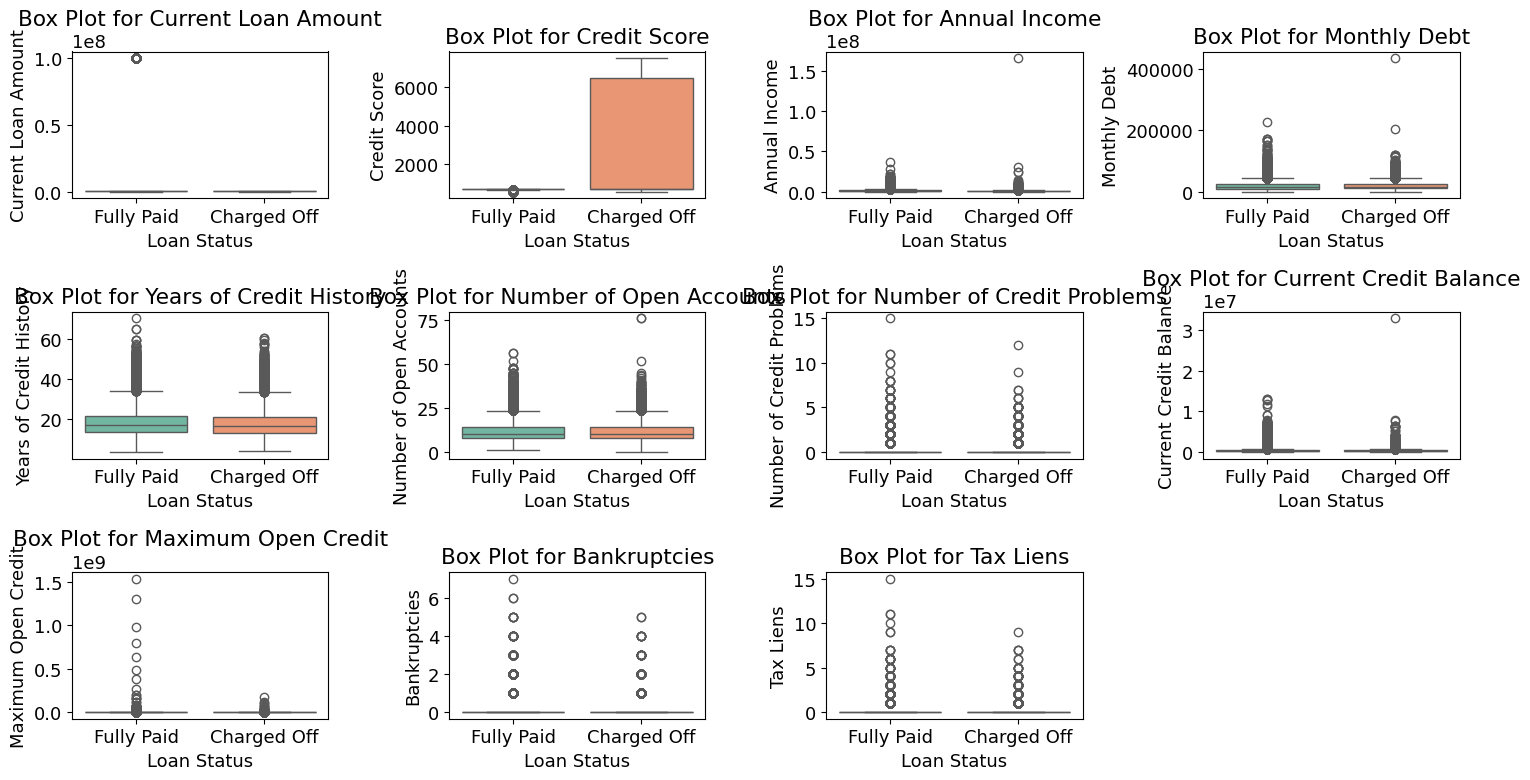

In [364]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# List of columns to include in the box plot
columns_to_plot = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 
                   'Years of Credit History', 'Number of Open Accounts', 'Number of Credit Problems', 
                   'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='Loan Status', y=column, data=data_train, palette='Set2')
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()


### Credit Score
From the box plots, the distribution of data in most of the columns are similar except Credit score column, so we analysed Credit score columed in depth. 

In [365]:
# Distribution plot for Annual Income
sns.kdeplot(data_train['Credit Score'], color="Blue", shade = True)

<Axes: xlabel='Credit Score', ylabel='Density'>

In [366]:
# Filtering the fully paid category with credit score
Fully_paid = data_train[data_train['Loan Status']=="Fully Paid"]
print(f"Min Charged off credit score {Fully_paid['Credit Score'].min()}")
print(f"Max Charged off credit score {Fully_paid['Credit Score'].max()}")
sns.displot(data = Fully_paid , x = "Credit Score" ,  kind="kde",)

Min Charged off credit score 585.0
Max Charged off credit score 751.0


The most widely used credit score models are FICO (Fair Isaac Corporation) scores and VantageScore. These scores typically range from 300 to 850, with higher scores indicating better creditworthiness. The breakdown of credit score ranges is often as follows:

- 300 - 579: Poor
- 580 - 669: Fair
- 670 - 739: Good
- 740 - 799: Very Good
- 800 - 850: Excellent

Loan status of Fully paid category starts from Credit score with 550 and ends at Credit score with 760. This is a Bimodal Distribution and skewed towards right side. So we can consider that most of the fully paid loan status people has the very good credit score 

In [367]:
# Filtering the Charged off category
Charged_off = data_train[data_train['Loan Status']=='Charged Off']
print(f"Min Charged off credit score {Charged_off['Credit Score'].min()}")
print(f"Max Charged off credit score {Charged_off['Credit Score'].max()}")
sns.displot(data = Charged_off , x = "Credit Score" ,  kind="kde",)

Min Charged off credit score 585.0
Max Charged off credit score 7510.0


Looking at the data we can say that this is a Unimodal distribution since have most of the values lie between 0 -2000, the rest of the values between 6000 - 8000 are considered as outliers. 

In [368]:
Fully_paid[Fully_paid["Credit Score"].isnull() == True]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
11,fa096848-6143-4907-b2cf-852a0b06171c,aa0a6a22-a95e-48e0-ba4f-b83456d424e4,Fully Paid,541970.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Home Improvements,23568.55,23.2,23.0,0.0,60705.0,1634468.0,0.0,0.0
15,7cbaa3fa-16fd-4343-9bcb-e90b34a1072f,3ec886e7-f15d-4c35-83d0-bdec4817ae4b,Fully Paid,449020.0,Long Term,NaN,NaN,9 years,Own Home,Debt Consolidation,18904.81,19.4,8.0,0.0,334533.0,428956.0,0.0,0.0
18,c6be21f0-80b1-46b3-8019-16646fd2137d,c67b2cb5-9f91-4bcb-9a03-03d1589c6c1a,Fully Paid,66396.0,Short Term,NaN,NaN,10+ years,Rent,Debt Consolidation,9898.81,27.1,23.0,1.0,9728.0,402380.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99976,a8de5307-3284-4ae0-80f4-8fe684268bce,744dbc23-9a5a-4ce7-b319-b079ba600754,Fully Paid,333630.0,Short Term,NaN,NaN,10+ years,Own Home,Debt Consolidation,35234.17,30.7,24.0,0.0,291650.0,1075492.0,0.0,0.0
99977,205e344c-5291-4e26-9f67-499bdc04869f,5cdbc32a-08a5-4f7e-8cb2-f599d39abf57,Fully Paid,483428.0,Short Term,NaN,NaN,10+ years,Rent,Debt Consolidation,19328.70,15.6,18.0,0.0,440572.0,824142.0,0.0,0.0
99978,94eaa3d9-2b9f-467b-855f-9e8f5eae57a4,4dba3a9b-1a39-4464-88df-c7f8735944d1,Fully Paid,431860.0,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,8465.07,18.5,5.0,0.0,241319.0,476806.0,0.0,0.0
99982,81389d2c-963c-40d4-a8eb-8329a3efadad,b1cb4f71-83a5-4152-b11e-fdf071fa2eba,Fully Paid,484968.0,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,20941.80,23.7,15.0,0.0,804175.0,1322662.0,0.0,0.0


In [369]:
Charged_off[Charged_off["Credit Score"].isnull() == True]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,15.0,0.0,193306.0,864204.0,0.0,0.0
16,c9a16a9d-8801-4430-b445-dbf9cf845e31,abb4c446-08ea-49ff-aeb8-5e1e9da673e7,Charged Off,653004.0,Long Term,NaN,NaN,7 years,Home Mortgage,Debt Consolidation,14537.09,20.5,9.0,0.0,302309.0,413754.0,0.0,0.0
38,03e3a77a-fa93-489c-b7b3-c06196ba3bce,dedbd71d-dabd-4c64-a38f-bb5886e7f8b6,Charged Off,259842.0,Short Term,NaN,NaN,8 years,Home Mortgage,Debt Consolidation,11792.73,20.6,9.0,0.0,401584.0,708818.0,0.0,0.0
52,b41e7075-f499-4311-8dfb-cbf23b045150,06d6c4a1-7a06-41c5-aeb1-fe0d7e5c895e,Charged Off,214874.0,Short Term,NaN,NaN,2 years,Rent,Debt Consolidation,20322.78,15.6,8.0,0.0,285589.0,402776.0,0.0,0.0
67,8196d772-1651-4a42-85a1-f92b51c415bb,fef3362a-2732-4520-ab83-4ce52074aa4e,Charged Off,751520.0,Long Term,NaN,NaN,6 years,Home Mortgage,Debt Consolidation,27204.01,20.5,19.0,0.0,483968.0,594880.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935,b96f7325-d082-4518-9ce7-2261ecb184c0,54edaa86-0cf7-4301-99b8-02c5a7035d57,Charged Off,220330.0,Short Term,NaN,NaN,10+ years,Rent,Debt Consolidation,13523.06,23.9,11.0,0.0,135850.0,268422.0,0.0,0.0
99943,b07fcf57-c30d-4271-adb7-3b3c140ef569,171de087-843e-4be2-9be1-5ed265f30bcc,Charged Off,90728.0,Short Term,NaN,NaN,2 years,Rent,Debt Consolidation,4896.68,8.6,4.0,0.0,60230.0,107954.0,0.0,0.0
99960,2b05fd68-7e13-4c7b-b58e-d24a66c77e3b,95240468-155c-45b1-80b8-e28fddb6aaa2,Charged Off,157278.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,12629.11,16.5,11.0,0.0,57342.0,205568.0,0.0,0.0
99988,125a4df1-c538-4b1e-b37f-b515a2ce370c,82488d29-ef29-4f1c-a786-dee1b257dee5,Charged Off,309474.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,13817.18,26.9,15.0,0.0,225872.0,892606.0,0.0,0.0


In [370]:
# Fill null values for Credit score
fill_list = data_train['Credit Score'].dropna()
data_train['Credit Score'] = data_train['Credit Score'].fillna(pd.Series(np.random.choice(fill_list , size = len(data_train.index))))
data_train.dropna(axis = 0, subset = ['Credit Score'], inplace = True)
sns.displot(data = data_train , x = "Credit Score" ,  kind="kde",)

### Annual Income

In [371]:
# Filtering the fully paid category with Annual Income
Fully_paid = data_train[data_train['Loan Status']=="Fully Paid"]
print(f"Min Charged off Annual Income {Fully_paid['Annual Income'].min()}")
print(f"Max Charged off Annual Income {Fully_paid['Annual Income'].max()}")
sns.displot(data = Fully_paid , x = "Annual Income" ,  kind="kde",)

Min Charged off Annual Income 81092.0
Max Charged off Annual Income 36475440.0


In [372]:
# Filtering the Charged off category Annual Income
Charged_off = data_train[data_train['Loan Status']=='Charged Off']
print(f"Min Charged off Annual Income {Charged_off['Annual Income'].min()}")
print(f"Max Charged off Annual Income {Charged_off['Annual Income'].max()}")
sns.displot(data = Charged_off , x = "Annual Income" ,  kind="kde",)

Min Charged off Annual Income 76627.0
Max Charged off Annual Income 165557393.0


From this plot, we can say that:-
- The data has a Unimodal Distribution, with only one peak distributed between 0.00 - 0.25 
- The data is not equally distributed, and its mostly left skewed. 
- Since most of the data is near to 0.00 and 0.1 we can consider that most of the people have less annual income 

In [373]:
# Fill null values for Annual Income
fill_list = data_train['Annual Income'].dropna()
data_train['Annual Income'] = data_train['Annual Income'].fillna(pd.Series(np.random.choice(fill_list , size = len(data_train.index))))
data_train.dropna(axis = 0, subset = ['Annual Income'], inplace = True)
sns.kdeplot(data_train['Annual Income'], color="Red", shade = True)

<Axes: xlabel='Annual Income', ylabel='Density'>

### Years in current job



In [374]:
# Distribution plot for Years in current job

plt.figure(figsize=(16,8))
sns.countplot(data_train['Years in current job'])

<Axes: xlabel='count', ylabel='Years in current job'>

In [375]:
Fully_paid['Years in current job'].value_counts()

Years in current job
10+ years    24367
2 years       7104
3 years       6420
< 1 year      6217
5 years       5244
1 year        4949
4 years       4761
6 years       4357
7 years       4283
8 years       3521
9 years       3007
Name: count, dtype: int64

In [376]:
Charged_off['Years in current job'].value_counts()

Years in current job
10+ years    6704
2 years      1995
< 1 year     1896
3 years      1729
5 years      1529
1 year       1485
4 years      1369
6 years      1317
7 years      1289
8 years      1047
9 years       942
Name: count, dtype: int64

From this plot we can see that most of the people applied for loans have more than 10 years of working experience. 

In [377]:
# fill null values for years in current job with '10+ years'
data_train['Years in current job'].fillna('10+ years', inplace=True) # fill with '10+ years'.
calculate_null_values(data_train)

,Field_names,Null_value,Null_values_percentage
0,Loan ID,0,0.0
1,Customer ID,0,0.0
2,Loan Status,0,0.0
3,Current Loan Amount,0,0.0
4,Term,0,0.0
5,Credit Score,0,0.0
6,Annual Income,0,0.0
7,Years in current job,0,0.0
8,Home Ownership,0,0.0
9,Purpose,0,0.0


In [378]:
# There are no null values now
plt.figure(figsize=(16,10))
sns.heatmap(data_train.isnull())

<Axes: >

In [379]:
data_train.shape

(99745, 18)

In [380]:
data_train.hist(bins=25,figsize=(20,10));

In [381]:
# Still we have imbalance data  
# Check for duplicate rows based on loan_id and customer_id
duplicate_loan_ids = data_train[data_train.duplicated(['Loan ID'], keep=False)]
duplicate_customer_ids = data_train[data_train.duplicated(['Customer ID'], keep=False)]

# Print the duplicate rows for loan_id and customer_id
print(f"Duplicate Rows based on loan_id:", duplicate_loan_ids)
print(f"Duplicate Rows based on customer_id:", duplicate_customer_ids)
data_train.duplicated().sum()

Duplicate Rows based on loan_id:                                     Loan ID  \
0      14dd8831-6af5-400b-83ec-68e61888a048   
3      77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
4      d4062e70-befa-4995-8643-a0de73938182   
8      8af915d9-9e91-44a0-b5a2-564a45c12089   
15     7cbaa3fa-16fd-4343-9bcb-e90b34a1072f   
...                                     ...   
99987  a4154f62-acf2-46b8-8a0e-e92ded2607d5   
99991  326d0f2b-015f-480e-90e9-9c0d7d307196   
99993  79b81158-5d55-4766-8ad6-ebcd683f7d59   
99994  8506a4e9-af7d-47d2-a1bf-7ea2c41858f0   
99995  3f94c18c-ba8f-45d0-8610-88a684a410a9   

                                Customer ID Loan Status  Current Loan Amount  \
0      981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid             445412.0   
3      e777faab-98ae-45af-9a86-7ce5b33b1011  Fully Paid             347666.0   
4      81536ad9-5ccf-4eb8-befb-47a4d608658e  Fully Paid             176220.0   
8      af534dea-d27e-4fd6-9de8-efaa52a78ec0  Fully Paid             548746.0   
15

10201

In [382]:
# Drop duplicated values
data_train.drop_duplicates(inplace=True)
data_train.shape

(89544, 18)

In [383]:
data_train["Loan Status"].value_counts()

Loan Status
Fully Paid     66974
Charged Off    22570
Name: count, dtype: int64

In [384]:
# Drop Loan id and customer id because we do nt need them for now
data_train = data_train.drop(labels=['Loan ID', 'Customer ID'], axis=1)
data_train.shape

(89544, 16)

In [385]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

v_counts(data_train)

Loan Status
Fully Paid     66974
Charged Off    22570
Name: count, dtype: int64
_____________________________________________________________________________
Current Loan Amount
99999999.0    11457
223652.0         24
216194.0         24
223322.0         24
223102.0         23
              ...  
425040.0          1
410564.0          1
279268.0          1
720522.0          1
274076.0          1
Name: count, Length: 21988, dtype: int64
_____________________________________________________________________________
Term
Short Term    65793
Long Term     23751
Name: count, dtype: int64
_____________________________________________________________________________
Credit Score
747.0     2231
746.0     2168
741.0     2150
740.0     2123
742.0     2106
          ... 
5900.0       1
5960.0       1
5860.0       1
5890.0       1
6050.0       1
Name: count, Length: 324, dtype: int64
_____________________________________________________________________________
Annual Income
1162572.0    23
1128486.0

### Converting all categorical values to numerical columns

In [386]:

l_encoder = LabelEncoder()

data_train['Loan Status'] = l_encoder.fit_transform(data_train['Loan Status'])
data_train['Term'] = l_encoder.fit_transform(data_train['Term'])
data_train['Years in current job'] = l_encoder.fit_transform(data_train['Years in current job'])
data_train['Home Ownership'] = l_encoder.fit_transform(data_train['Home Ownership'])
data_train['Purpose'] = l_encoder.fit_transform(data_train['Purpose'])

v_counts(data_train)

Loan Status
1    66974
0    22570
Name: count, dtype: int64
_____________________________________________________________________________
Current Loan Amount
99999999.0    11457
223652.0         24
216194.0         24
223322.0         24
223102.0         23
              ...  
425040.0          1
410564.0          1
279268.0          1
720522.0          1
274076.0          1
Name: count, Length: 21988, dtype: int64
_____________________________________________________________________________
Term
1    65793
0    23751
Name: count, dtype: int64
_____________________________________________________________________________
Credit Score
747.0     2231
746.0     2168
741.0     2150
740.0     2123
742.0     2106
          ... 
5900.0       1
5960.0       1
5860.0       1
5890.0       1
6050.0       1
Name: count, Length: 324, dtype: int64
_____________________________________________________________________________
Annual Income
1162572.0    23
1128486.0    20
949905.0     20
969475.0     20

In [387]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89544 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                89544 non-null  int64  
 1   Current Loan Amount        89544 non-null  float64
 2   Term                       89544 non-null  int64  
 3   Credit Score               89544 non-null  float64
 4   Annual Income              89544 non-null  float64
 5   Years in current job       89544 non-null  int64  
 6   Home Ownership             89544 non-null  int64  
 7   Purpose                    89544 non-null  int64  
 8   Monthly Debt               89544 non-null  float64
 9   Years of Credit History    89544 non-null  float64
 10  Number of Open Accounts    89544 non-null  float64
 11  Number of Credit Problems  89544 non-null  float64
 12  Current Credit Balance     89544 non-null  float64
 13  Maximum Open Credit        89544 non-null  float64


## Data Splitting

In [388]:
# Splitting the dataset

x= data_train.drop(['Loan Status'] , axis=1).values
y = data_train['Loan Status'].values

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.25 , random_state= 3)

print(x_train.shape , x_test.shape)

(67158, 15) (22386, 15)


## Model building and Training

In [389]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Instantiate the XGBClassifier
xgb_classifier = XGBClassifier()

# Train the classifier on the training set
xgb_classifier.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = xgb_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.74
Confusion Matrix:
[[   72  5570]
 [  182 16562]]
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.01      0.02      5642
           1       0.75      0.99      0.85     16744

    accuracy                           0.74     22386
   macro avg       0.52      0.50      0.44     22386
weighted avg       0.63      0.74      0.64     22386



In [390]:
# Instantiate the XGBClassifier with hyperparameters
xgb_classifier = XGBClassifier(
    objective='binary:logistic',  # Binary classification problem
    max_depth=3,                  # Maximum depth of a tree
    learning_rate=0.1,            # Step size shrinkage used in each boosting step
    n_estimators=100,             # Number of boosting rounds
    subsample=0.8,                # Fraction of samples used for fitting the individual base learners
    colsample_bytree=0.8,         # Fraction of features used for fitting the individual base learners
    gamma=0.1,                    # Minimum loss reduction required to make a further partition on a leaf node
    random_state=42               # Seed for reproducibility
)

# Train the classifier on the training set
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgb_classifier.predict(X_test)

# Save the entire pipeline
joblib.dump(xgb_classifier, 'xgbc.joblib')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.79
Confusion Matrix:
[[ 1182  4460]
 [  201 16543]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.21      0.34      5642
           1       0.79      0.99      0.88     16744

    accuracy                           0.79     22386
   macro avg       0.82      0.60      0.61     22386
weighted avg       0.80      0.79      0.74     22386



In [391]:
# Create a pipeline with preprocessing steps and XGBoost classifier

'''
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', xgb.XGBClassifier(
        learning_rate=0.1,
        n_estimators=150,
        max_depth=3,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=42
    ))
])

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Save the entire pipeline
joblib.dump(pipeline, 'xgb.joblib')

# Make predictions on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))
'''

'\npipeline = Pipeline([\n    (\'scaler\', StandardScaler()), \n    (\'classifier\', xgb.XGBClassifier(\n        learning_rate=0.1,\n        n_estimators=150,\n        max_depth=3,\n        min_child_weight=1,\n        gamma=0,\n        subsample=0.8,\n        colsample_bytree=0.8,\n        objective=\'binary:logistic\',\n        nthread=4,\n        scale_pos_weight=1,\n        seed=42\n    ))\n])\n\n# Fit the pipeline on the training data\npipeline.fit(x_train, y_train)\n\n# Save the entire pipeline\njoblib.dump(pipeline, \'xgb.joblib\')\n\n# Make predictions on the test set\ny_pred = pipeline.predict(x_test)\n\n# Evaluate the performance of the classifier\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Accuracy: {accuracy}")\n\n# Print the classification report\nprint(classification_report(y_test, y_pred))\n'

In [392]:
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_output

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
22381,1,1
22382,1,1
22383,0,1
22384,0,1


In [393]:
# Selecting few instances based on some criteria 
# 1. Misclassified Instances
misclassified_indices = y_test != y_pred
misclassified_instances = pd.DataFrame(x_test[misclassified_indices][:2], columns=[f'feature_{i}' for i in range(x_test.shape[1])])

# 2. Low Confidence Predictions
proba = xgb_classifier.predict_proba(x_test)
low_confidence_indices = (proba.max(axis=1) < 0.7) & misclassified_indices
low_confidence_instances = pd.DataFrame(x_test[low_confidence_indices][:2], columns=[f'feature_{i}' for i in range(x_test.shape[1])])

# 3. High Confidence Predictions
high_confidence_indices = (proba.max(axis=1) > 0.9) & (~misclassified_indices)
high_confidence_instances = pd.DataFrame(x_test[high_confidence_indices][:2], columns=[f'feature_{i}' for i in range(x_test.shape[1])])

# 4. Randomly Sample Remaining Instances
correctly_classified_indices = ~misclassified_indices
correctly_classified_instances = pd.DataFrame(x_test[correctly_classified_indices][:4], columns=[f'feature_{i}' for i in range(x_test.shape[1])])
 
# 5. Combine and Inspect
selected_instances = pd.concat([
    misclassified_instances,
    low_confidence_instances,
    high_confidence_instances,
    correctly_classified_instances
])

selected_instances


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14
0,447172.0,0.0,720.0,1800972.0,7.0,1.0,7.0,10265.51,14.0,12.0,0.0,137332.0,638660.0,0.0,0.0
1,345422.0,1.0,706.0,2861172.0,0.0,1.0,3.0,7830.85,14.2,7.0,0.0,307097.0,494560.0,0.0,0.0
0,439824.0,0.0,702.0,1479625.0,10.0,2.0,3.0,16122.07,15.1,11.0,0.0,489649.0,734404.0,0.0,0.0
1,484264.0,0.0,711.0,912646.0,6.0,1.0,3.0,25858.62,10.9,15.0,0.0,289123.0,533962.0,0.0,0.0
0,99999999.0,1.0,750.0,1616292.0,2.0,1.0,5.0,15220.14,20.9,6.0,0.0,80142.0,187110.0,0.0,0.0
1,266684.0,1.0,748.0,2495194.0,1.0,1.0,5.0,15470.18,19.2,14.0,0.0,276184.0,1133990.0,0.0,0.0
0,67232.0,1.0,699.0,290301.0,10.0,3.0,3.0,1858.01,13.1,3.0,0.0,46607.0,60500.0,0.0,0.0
1,527164.0,1.0,742.0,1697783.0,3.0,1.0,5.0,6168.54,20.9,3.0,0.0,237842.0,483142.0,0.0,0.0
2,649704.0,1.0,701.0,2057396.0,1.0,3.0,3.0,27089.06,13.5,23.0,0.0,471960.0,1339426.0,0.0,0.0
3,99999999.0,1.0,750.0,1616292.0,2.0,1.0,5.0,15220.14,20.9,6.0,0.0,80142.0,187110.0,0.0,0.0


In [394]:
selected_instances.rename({'feature_0':'Current Loan Amount', 'feature_1':'Term', 'feature_2':'Credit Score', 'feature_3':'Annual Income', 'feature_4':'Years in current job',
       'feature_5':'Home Ownership', 'feature_6':'Purpose', 'feature_7':'Monthly Debt', 'feature_8':'Years of Credit History', 'feature_9':'Number of Open Accounts',
       'feature_10':'Number of Credit Problems', 'feature_11':'Current Credit Balance', 'feature_12':'Maximum Open Credit', 'feature_13':'Bankruptcies', 'feature_14':'Tax Liens'}, axis=1,inplace=True)
selected_instances

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,447172.0,0.0,720.0,1800972.0,7.0,1.0,7.0,10265.51,14.0,12.0,0.0,137332.0,638660.0,0.0,0.0
1,345422.0,1.0,706.0,2861172.0,0.0,1.0,3.0,7830.85,14.2,7.0,0.0,307097.0,494560.0,0.0,0.0
0,439824.0,0.0,702.0,1479625.0,10.0,2.0,3.0,16122.07,15.1,11.0,0.0,489649.0,734404.0,0.0,0.0
1,484264.0,0.0,711.0,912646.0,6.0,1.0,3.0,25858.62,10.9,15.0,0.0,289123.0,533962.0,0.0,0.0
0,99999999.0,1.0,750.0,1616292.0,2.0,1.0,5.0,15220.14,20.9,6.0,0.0,80142.0,187110.0,0.0,0.0
1,266684.0,1.0,748.0,2495194.0,1.0,1.0,5.0,15470.18,19.2,14.0,0.0,276184.0,1133990.0,0.0,0.0
0,67232.0,1.0,699.0,290301.0,10.0,3.0,3.0,1858.01,13.1,3.0,0.0,46607.0,60500.0,0.0,0.0
1,527164.0,1.0,742.0,1697783.0,3.0,1.0,5.0,6168.54,20.9,3.0,0.0,237842.0,483142.0,0.0,0.0
2,649704.0,1.0,701.0,2057396.0,1.0,3.0,3.0,27089.06,13.5,23.0,0.0,471960.0,1339426.0,0.0,0.0
3,99999999.0,1.0,750.0,1616292.0,2.0,1.0,5.0,15220.14,20.9,6.0,0.0,80142.0,187110.0,0.0,0.0


In [395]:
selected_instances.shape

(10, 15)

# Building SHAP Model

In [396]:
#we need an instance of explainer for a tree-based model, i.e. our random forest (rf)
#Explainers are in-built methods of these libraries, customisable by the attributes they can take in
explainer = shap.Explainer(xgb_classifier) 
#shap_values = explainer.shap_values(x_test.iloc[0]) #pass the first test sample, to see what influenced the first value. we can iterate for other values as well.
shap_values = explainer(selected_instances)



In [397]:
np.shape(shap_values.values)

(10, 15)

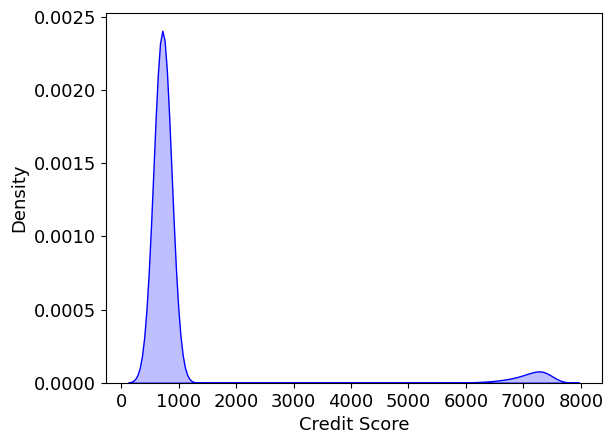

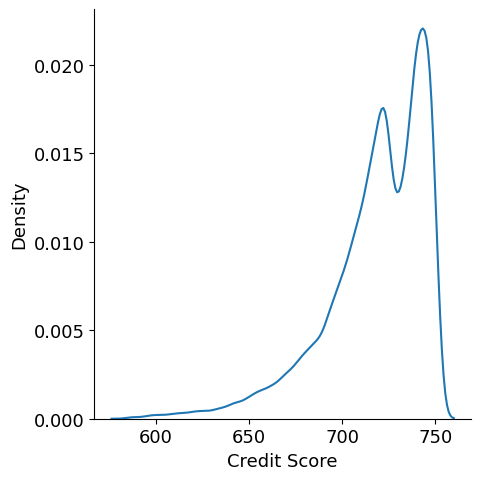

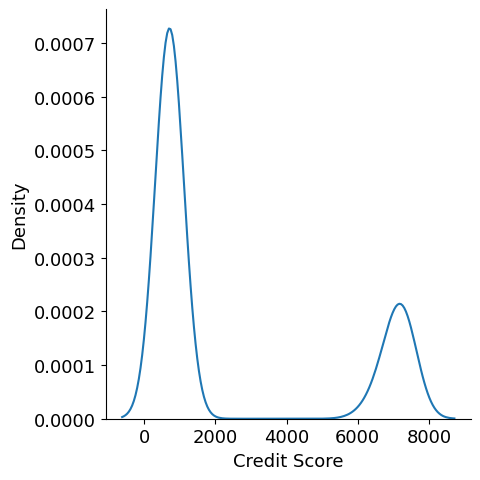

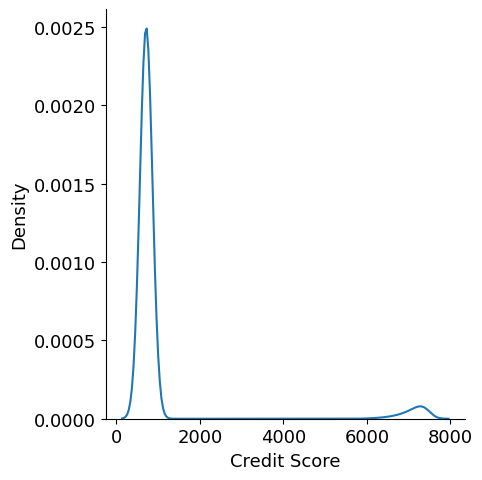

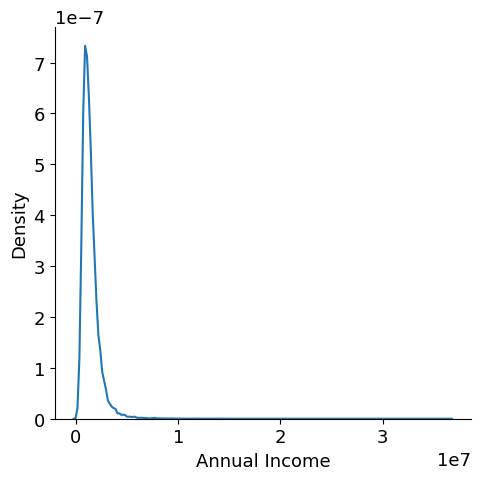

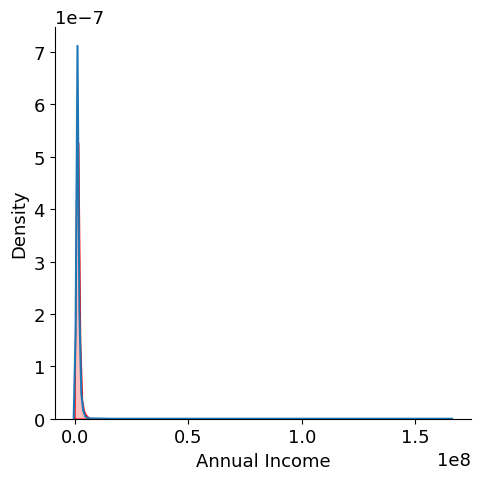

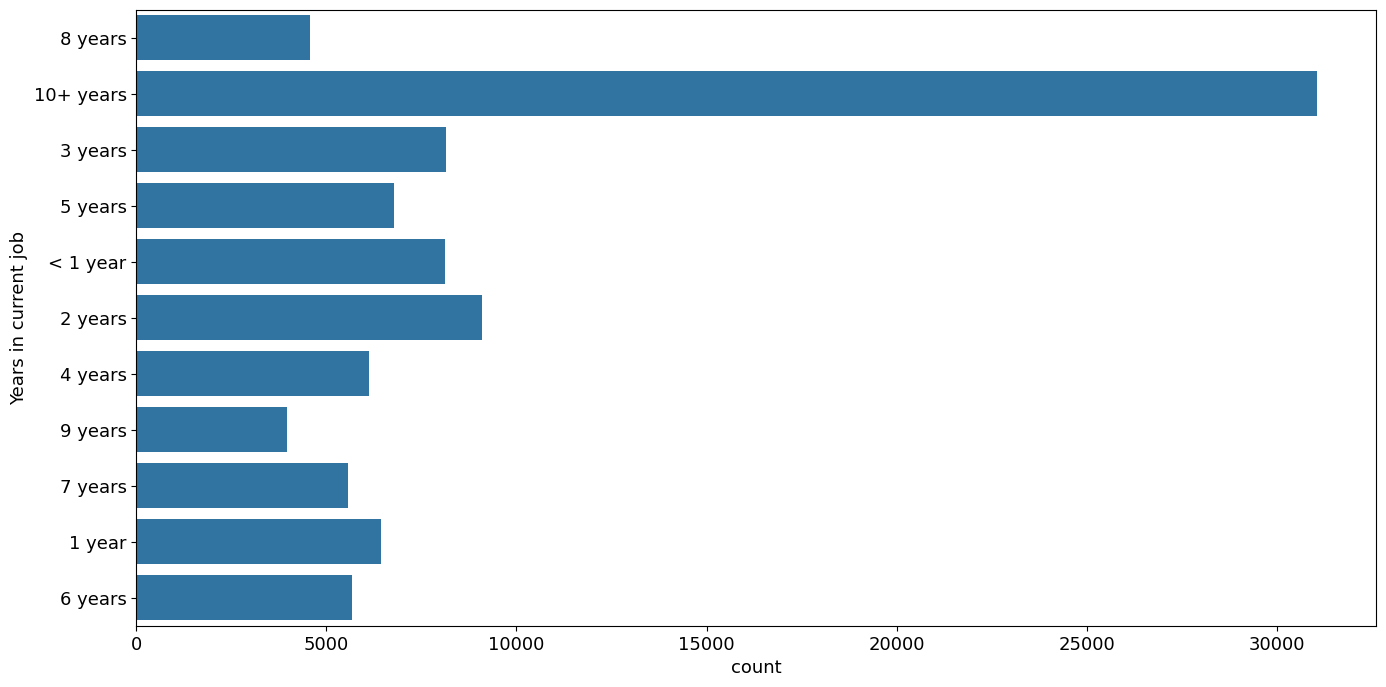

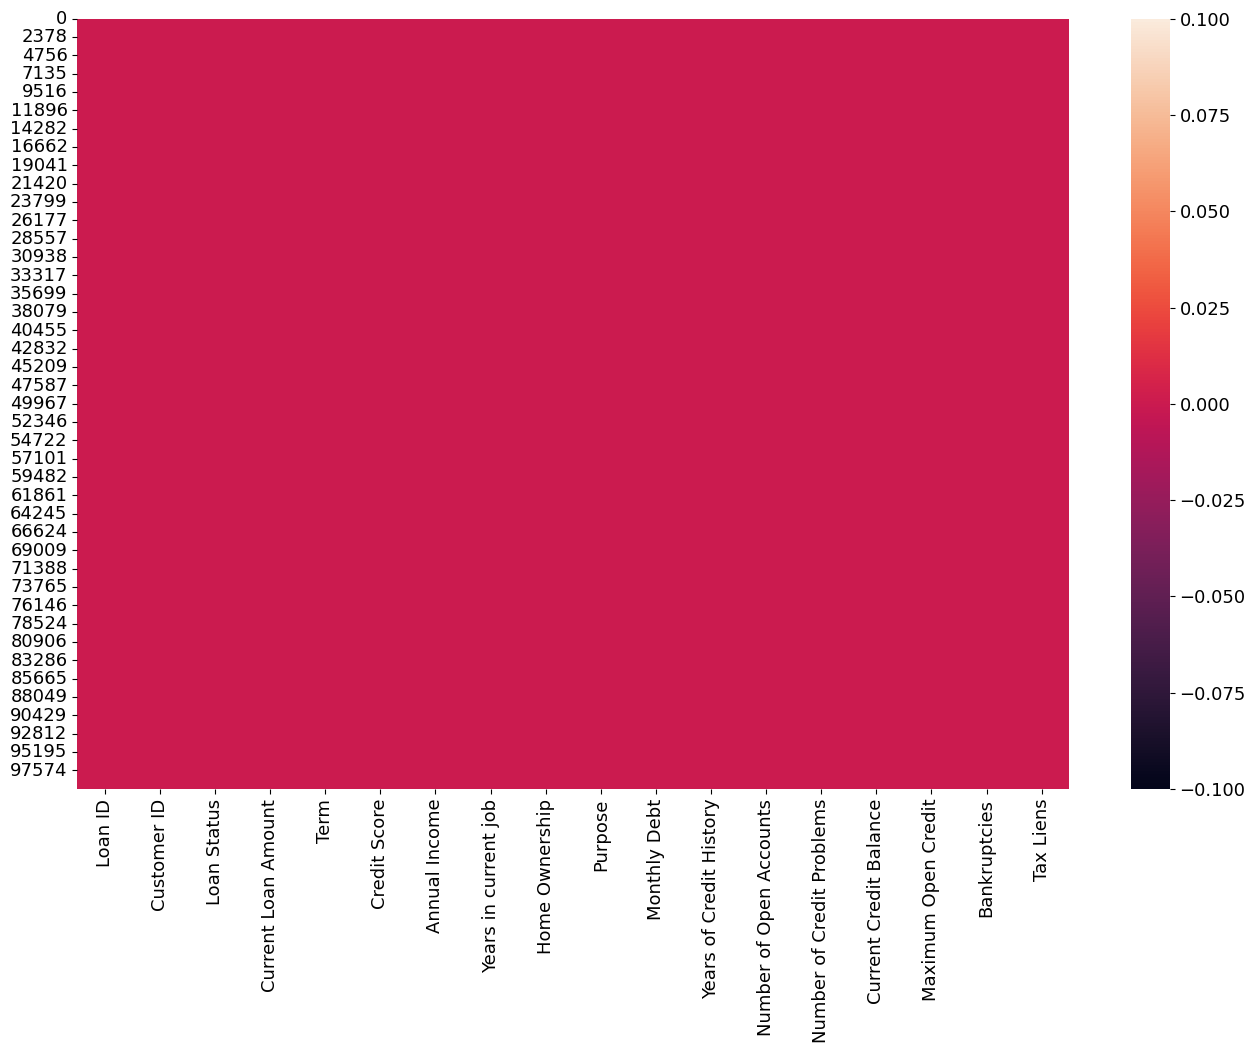

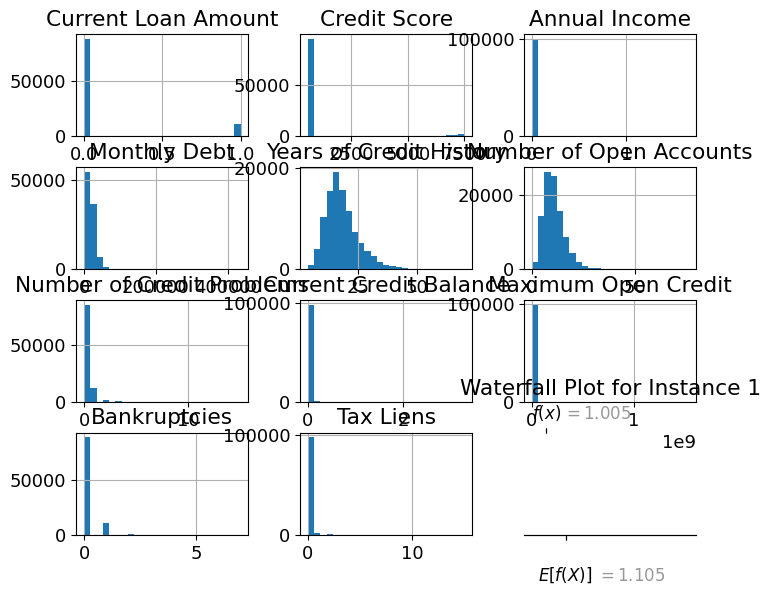

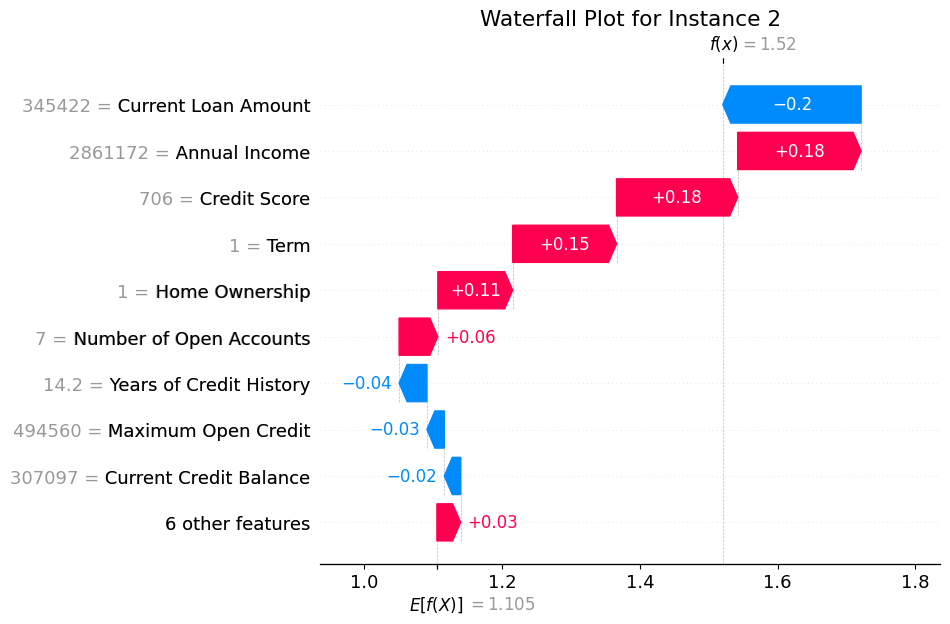

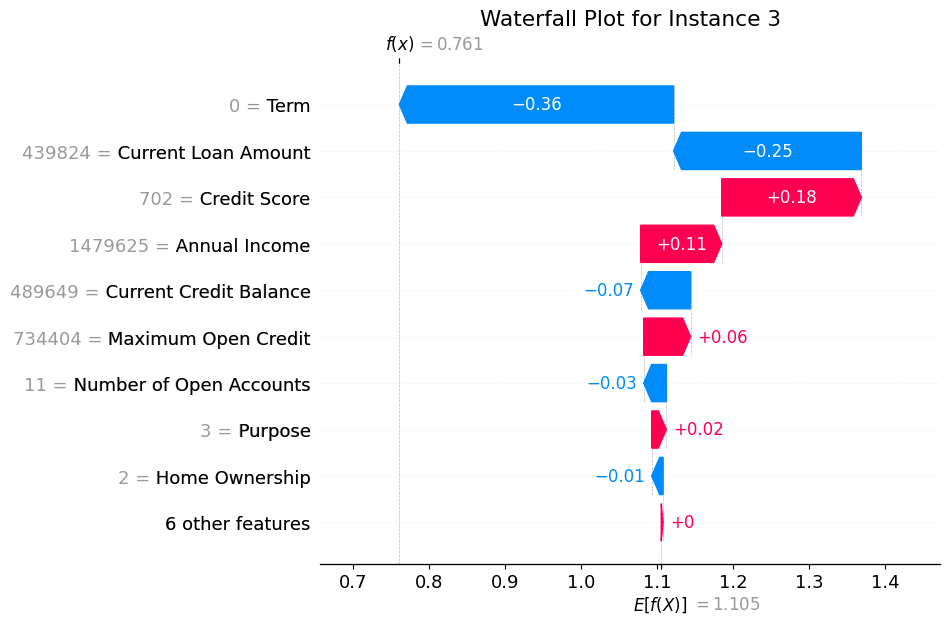

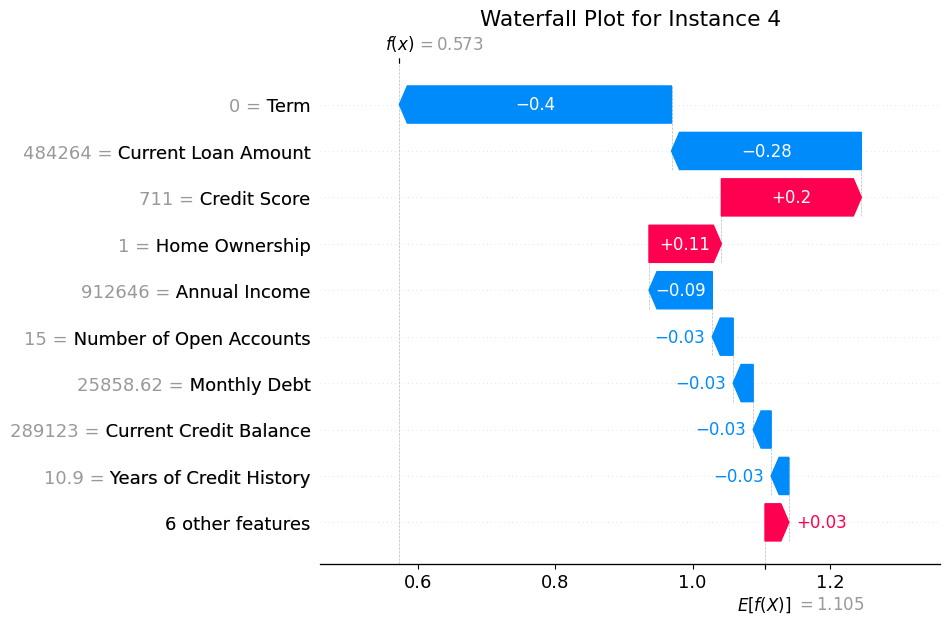

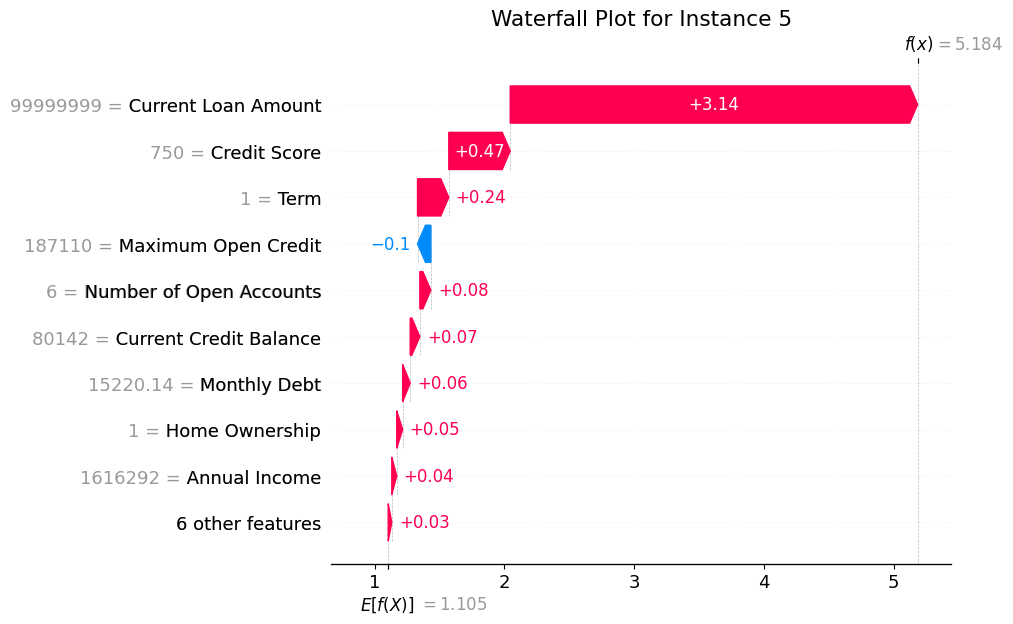

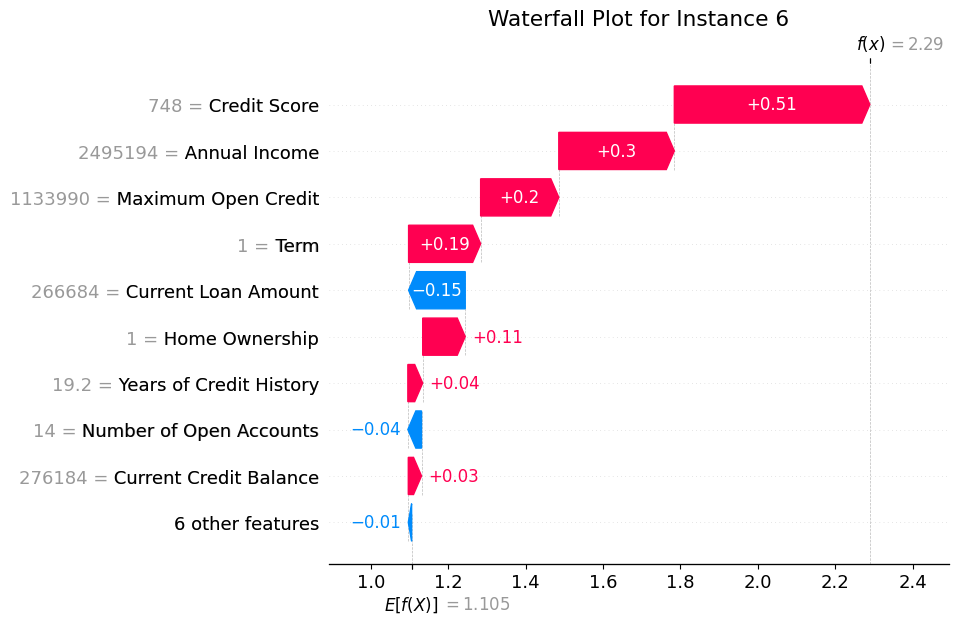

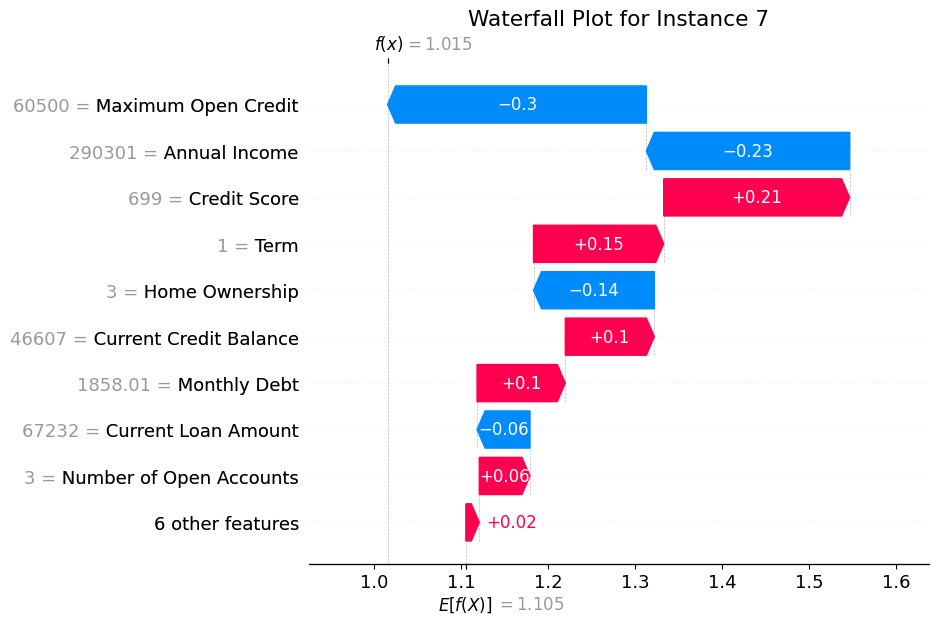

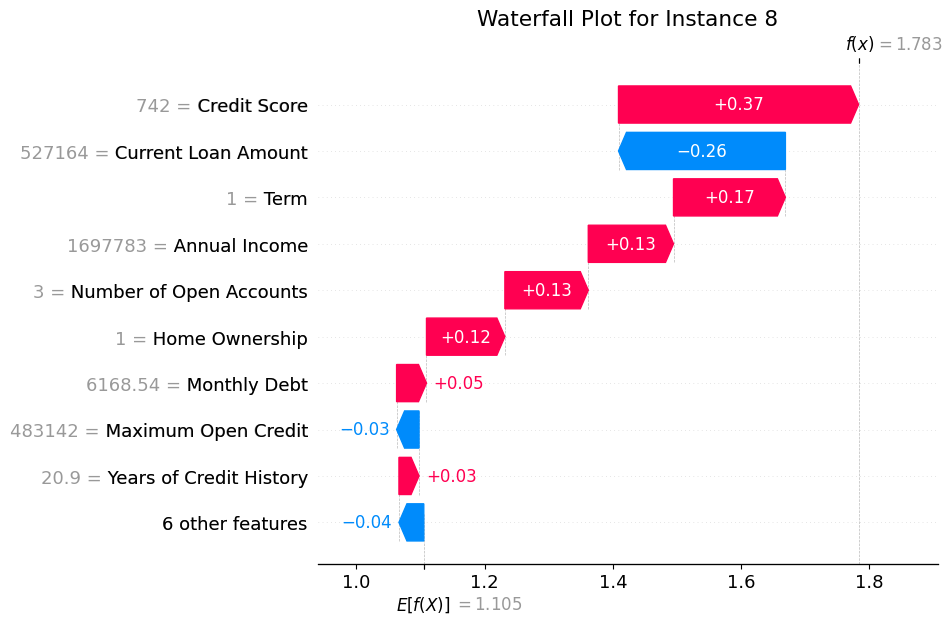

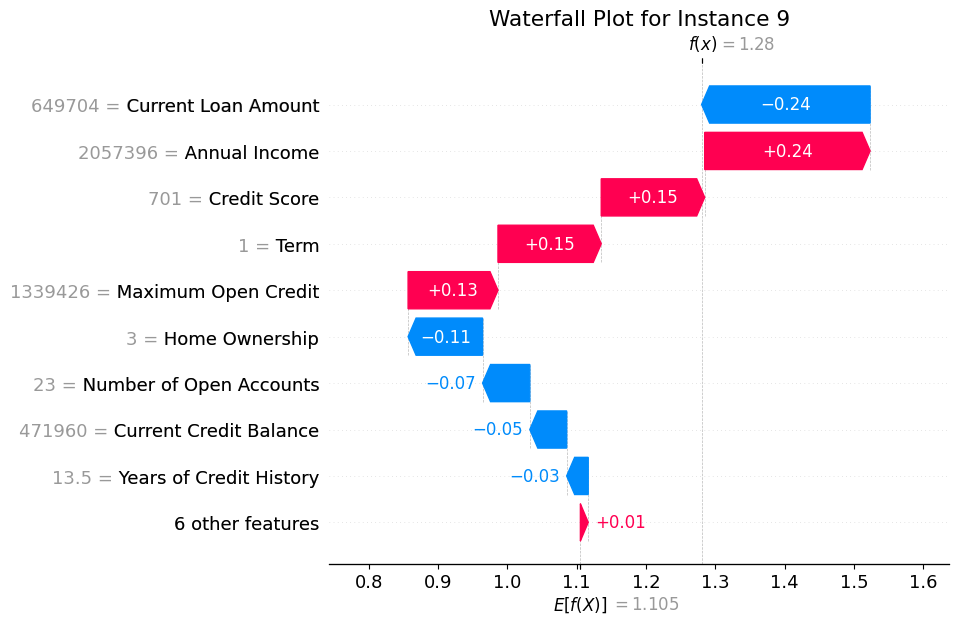

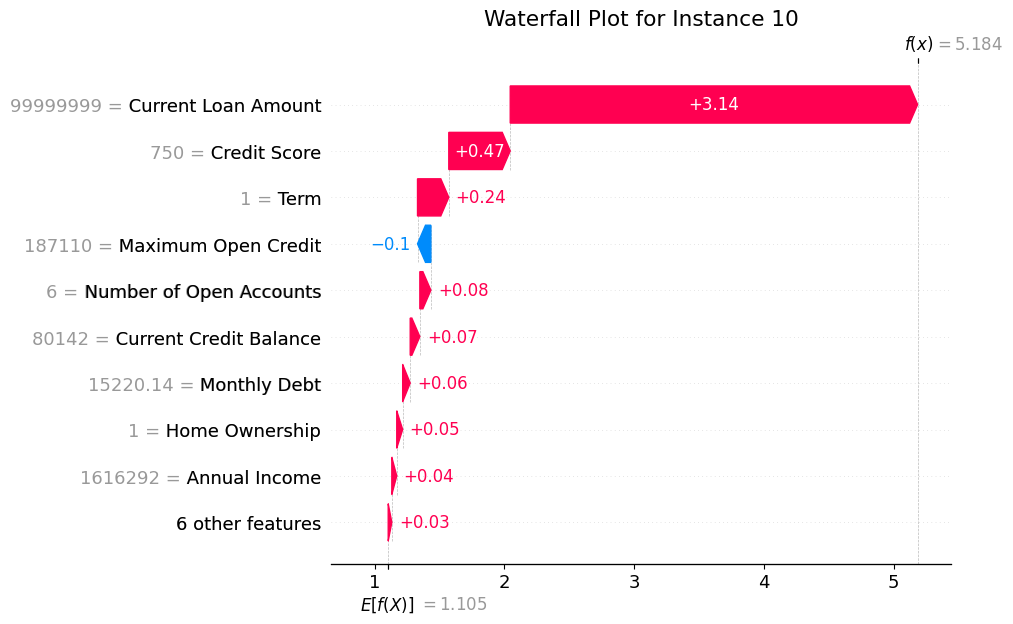

In [398]:
#shap.plots.waterfall(shap_values[0])
shap_values = explainer(selected_instances[:10])  # Taking the first 10 instances

# Loop through each instance and create waterfall plots
for i in range(10):
    shap.waterfall_plot(shap.Explanation(values=shap_values[i, :], base_values=explainer.expected_value, feature_names=selected_instances.columns), show=False)
    plt.title(f'Waterfall Plot for Instance {i+1}')
    plt.show()

In [400]:
#force plots
shap.initjs() #to make the visualization happen in the notebook environment
shap.plots.force(shap_values[0])
#shap.force_plot(explainer.expected_value[0], shap_values=shap_values[0], features=x.iloc[0, :])

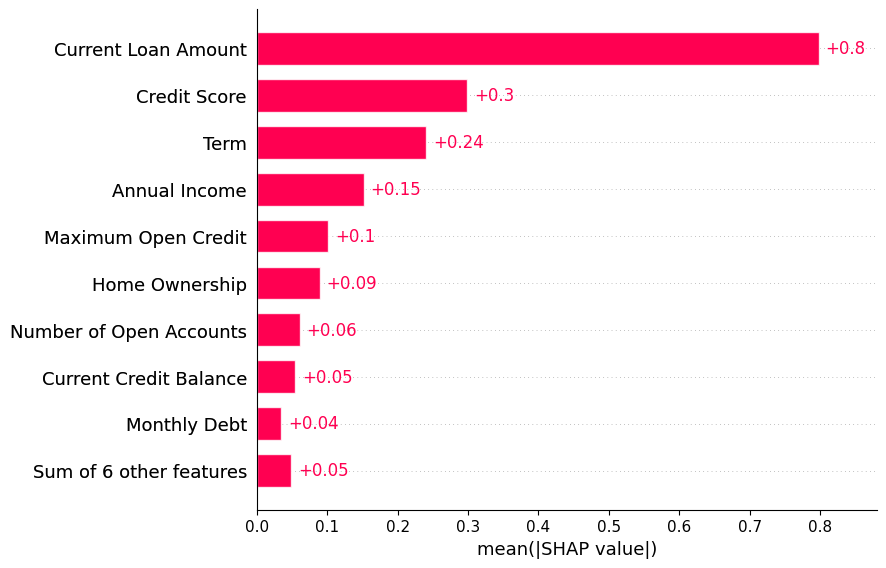

In [401]:
# Overall Analysis
#Absolute mean SHAP
shap.plots.bar(shap_values)

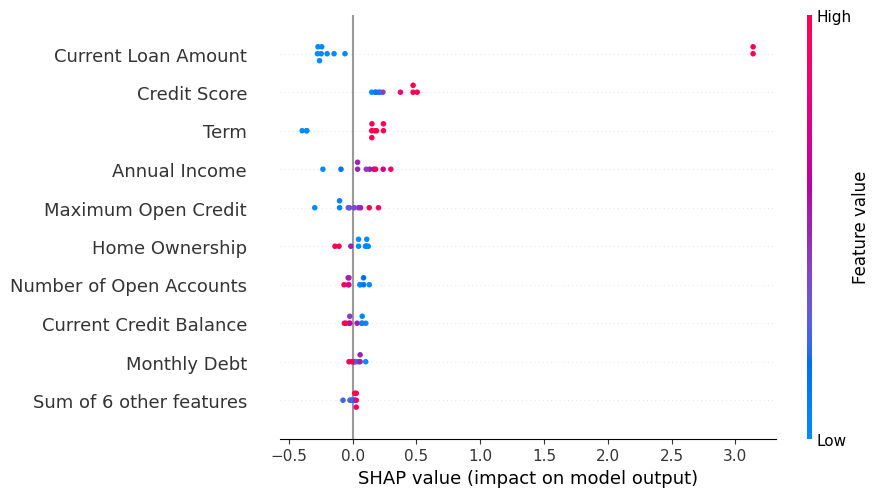

In [402]:
shap.plots.beeswarm(shap_values)